## Comparing finalized datasets (NAM vs uWRF)

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature

In [17]:
nam = xr.open_dataset('/Users/gabbyvaillant/Downloads/BNL/final-NAM-files/NAM_final_2019-10-11-spatial.nc')
nam

<xarray.Dataset> Size: 6kB
Dimensions:    (time: 29, latitude: 3, longitude: 2)
Coordinates:
  * latitude   (latitude) float64 24B 40.68 40.79 40.91
  * longitude  (longitude) float64 16B -74.03 -73.87
  * time       (time) datetime64[ns] 232B 2019-10-11 ... 2019-10-14T12:00:00
Data variables:
    T2         (time, latitude, longitude) float64 1kB ...
    U10        (time, latitude, longitude) float64 1kB ...
    V10        (time, latitude, longitude) float64 1kB ...
    PSFC       (time, latitude, longitude) float64 1kB ...
Attributes:
    Conventions:          CF-1.0
    History:              created by wgrib2
    GRIB2_grid_template:  30

In [5]:
uwrf = xr.open_dataset('/Users/gabbyvaillant/Downloads/BNL/final-uWRF-files/uWRF_final_20191011.nc')
uwrf

<xarray.Dataset> Size: 37kB
Dimensions:    (time: 29, latitude: 10, longitude: 4)
Coordinates:
  * latitude   (latitude) float64 80B 40.59 40.63 40.66 ... 40.84 40.87 40.91
  * longitude  (longitude) float64 32B -74.03 -73.98 -73.94 -73.89
  * time       (time) datetime64[ns] 232B 2019-10-11 ... 2019-10-14T12:00:00
Data variables:
    T2         (time, latitude, longitude) float64 9kB ...
    U10        (time, latitude, longitude) float64 9kB ...
    V10        (time, latitude, longitude) float64 9kB ...
    PSFC       (time, latitude, longitude) float64 9kB ...
Attributes: (12/119)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2019-10-11_00:00:00
    SIMULATION_START_DATE:           2019-10-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        121
    SOUTH-NORTH_GRID_DIMENSION:      121
    BOTTOM-TOP_GRID_DIMENSION:       51
    ...                              ...
    ISLAKE:                          -1
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      -1
    ETAC:                            0.0

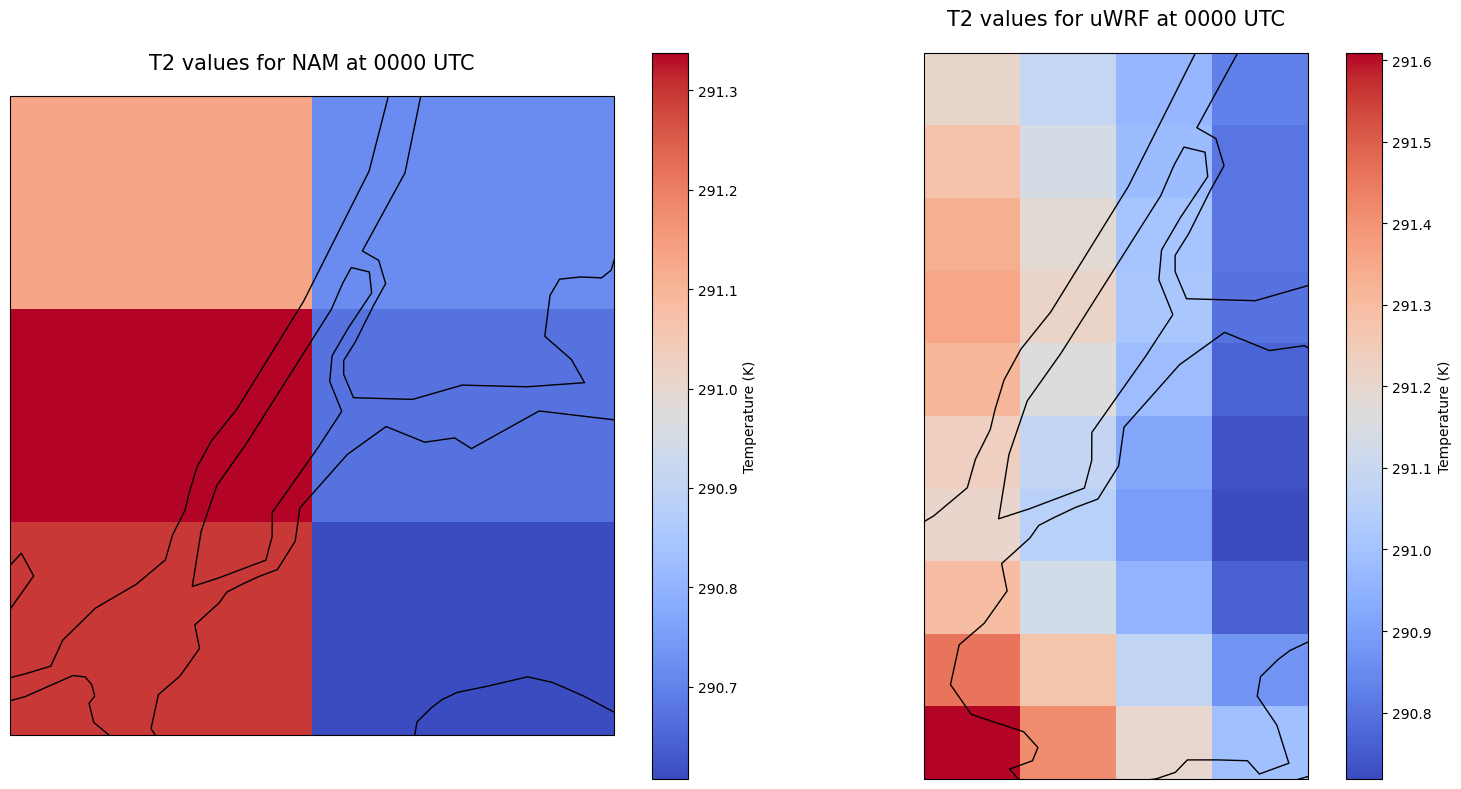

In [19]:
uwrf = xr.open_dataset('/Users/gabbyvaillant/Downloads/BNL/final-uWRF-files/uWRF_final_20191011.nc')
nam = xr.open_dataset('/Users/gabbyvaillant/Downloads/BNL/final-NAM-files/NAM_final_2019-10-11-spatial.nc')

fig, axes = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})


### Plot on left will be NAM data ####

ax1 = axes[0]

T2 = nam['T2'].isel(time=0)

lat = nam['latitude'].values
lon = nam['longitude'].values

min_lat = 40.57384924257281
max_lat = 40.92
min_lon = -74.0481110602903
max_lon = -73.84627819243957

projection = ccrs.PlateCarree()

ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, edgecolor='black')
ax1.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='lightblue')
ax1.add_feature(cfeature.LAKES, edgecolor='black', facecolor='lightblue')
ax1.add_feature(cfeature.RIVERS, edgecolor='blue')
ax1.add_feature(cfeature.COASTLINE)

c = ax1.pcolormesh(lon, lat, T2, transform=projection, cmap='coolwarm', shading='auto')

plt.colorbar(c, ax=ax1, orientation='vertical', label='Temperature (K)')

ax1.set_title('T2 values for NAM at 0000 UTC', fontsize=15, pad=20)
#ax1.set_extent([min_lon + 0.02, max_lon - 0.05, min_lat + 0.05, max_lat- 0.04], crs=ccrs.PlateCarree())


### Plot on right will be uWRF ###

ax2 = axes[1]
T2 = uwrf['T2'].isel(time=0)

lat = uwrf['latitude'].values
lon = uwrf['longitude'].values

min_lat = 40.57384924257281
max_lat = 40.92
min_lon = -74.0481110602903
max_lon = -73.84627819243957

projection = ccrs.PlateCarree()

ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, edgecolor='black')
ax2.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='lightblue')
ax2.add_feature(cfeature.LAKES, edgecolor='black', facecolor='lightblue')
ax2.add_feature(cfeature.RIVERS, edgecolor='blue')
ax2.add_feature(cfeature.COASTLINE)

c = ax2.pcolormesh(lon, lat, T2, transform=projection, cmap='coolwarm', shading='auto')

plt.colorbar(c, ax=ax2, orientation='vertical', label='Temperature (K)')

ax2.set_title('T2 values for uWRF at 0000 UTC', fontsize=15, pad=20)
#ax2.set_extent([min_lon + 0.02, max_lon - 0.05, min_lat + 0.05, max_lat- 0.04], crs=ccrs.PlateCarree())
#ax2.set_extent([min_lon - .025, max_lon + 0.025, min_lat - 0.025, max_lat + 0.025], crs = ccrs.PlateCarree())


plt.tight_layout()
plt.show()
